In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

Coded it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [2]:
def y_calc(x,k):
    [a,m,s] = k
    return a*np.exp(-1*np.square(x-m)/(2*s*s))

def r_calc(k,x_obs,y_obs):    
    rk = y_calc(x_obs,k) - y_obs
    return rk
    
def jacobian(x,k):
    [a,m,s] = k
    j = np.array([np.exp(-1*np.square(x-m)/(2*s*s)), a*(x-m)/(s*s) * np.exp(-1*np.square(x-m)/(2*s*s)), a*np.square(x-m)/(s*s*s) *  np.exp(-1*np.square(x-m)/(2*s*s))])    
    return j

def k_calc(a,m,s):
    k = np.array([a,m,s]).T
    return k
    
def r_square_calc(k,x_obs,y_obs):
    return np.square(np.linalg.norm(r_calc(k,x_obs,y_obs)))
    
#Actual Parameters
a_gt, m_gt, s_gt = 10, 0, 20 
num_obs = 50
x_obs = np.linspace(-25,25,num_obs)
k_gt = k_calc(a_gt,m_gt,s_gt)
y_obs = y_calc(x_obs,k_gt)

#print(np.shape(x_obs),np.shape(y_obs))

#Initial Estimates
a0, m0, s0 = 10, 13, 19.12
#a0, m0, s0 = 100, 50, 100

#Initializations
lr = 0.01
num_iter = 500
tol = 1e-10

k = k_calc(a0,m0,s0)


In [3]:
def gradient_des(x_obs,y_obs,k,num_iter,lr):
    rsq_gradient = []
    error = 0
    for i in range(num_iter):
    
    
        Jr = jacobian(x_obs, k)
        rk = r_calc(k,x_obs,y_obs)
        Jf = np.dot(Jr,rk)
                      
        delta_k = -1 * lr * Jf    
        k = k + delta_k    

        r_sq_val = r_square_calc(k,x_obs,y_obs)
        rsq_gradient.append(r_sq_val)
        error = r_sq_val
        
        if(r_sq_val < tol):
            break
 
    #print("Error = ", error)
    return k, rsq_gradient

In [4]:
def gauss_newton(x_obs,y_obs,k,num_iter):
    rsq_gauss_newton = []
    error = 0
    k_gn = k
    for i in range(num_iter):
        Jr = jacobian(x_obs, k_gn)
        rk = r_calc(k_gn,x_obs,y_obs)
        Jf = np.dot(Jr,rk)
    
        r_sq_val = r_square_calc(k_gn,x_obs,y_obs)
        rsq_gauss_newton.append(r_sq_val)
        error = r_sq_val
        delta_k_gn = -1 * np.dot(np.linalg.inv(np.dot(Jr,Jr.T)) , Jf)
        k_gn = k_gn + delta_k_gn
    
        if(r_sq_val < tol):
            break
    #print("Error = ", error)
    return k_gn, rsq_gauss_newton    

In [5]:
def lm(x_obs,y_obs,k,num_iter,lenda):
    rsq_lm = []
    k_lm = k
    error = 0
    for i in range(num_iter):
        Jr = jacobian(x_obs, k_lm)
        rk = r_calc(k_lm,x_obs,y_obs)
        Jf = np.dot(Jr,rk)
    
        r_sq_val = r_square_calc(k_lm,x_obs,y_obs)
        rsq_lm.append(r_sq_val)
        error = r_sq_val
    
        delta_k_lm = -1 * np.dot(np.linalg.inv(np.dot(Jr,Jr.T) + lenda * np.identity(3)) , Jf)
        k_lm = k_lm + delta_k_lm
    
        if(r_sq_val < tol):
            break
    #print("Error = ", error)        
    return k_lm, rsq_lm

Gradient Descent - 200 iterations


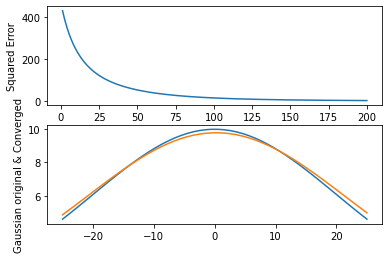

Gradient Descent - 500 iterations


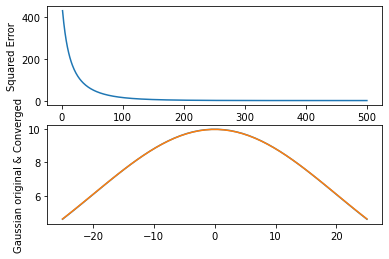

Gradient Descent - 4000 iterations


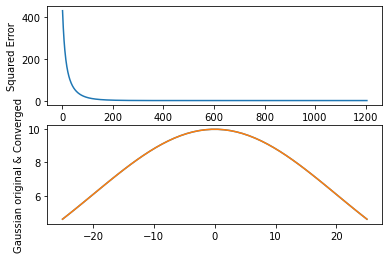

Gradient Descent - Learning rate = 0.1 - 4000 iterations


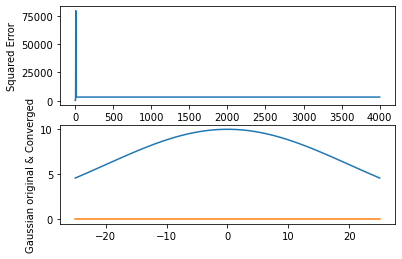

Gauss Newton


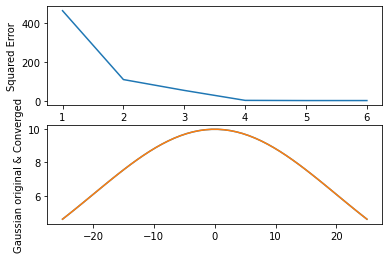

Levenberg Marquardt - Lenda = 0.01


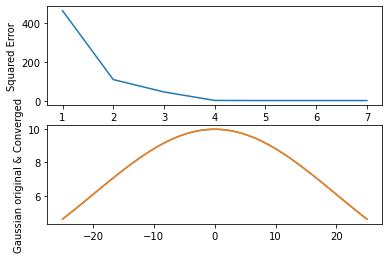

Levenberg Marquardt - Lenda = 0.02


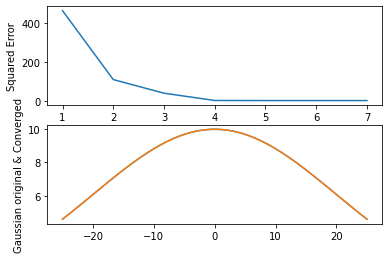

Levenberg Marquardt - Lenda = 0.1


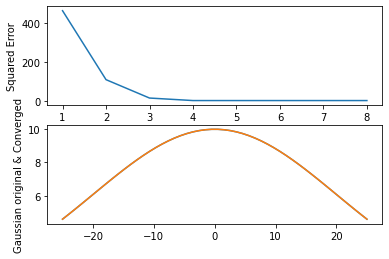

Levenberg Marquardt - Lenda = 0.01 - Large Initialization


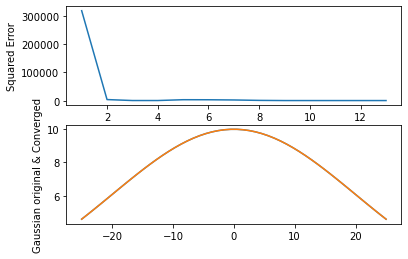

Adding Noise

Gradient Descent - Noise factor = 0.01 
Error =  0.032341987663752576


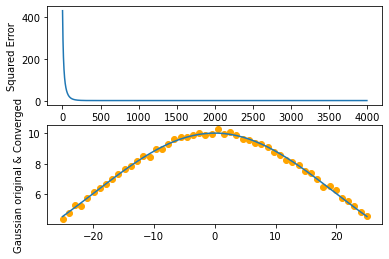

Gradient Descent - Noise factor = 0.02
Error =  0.22143211163793036


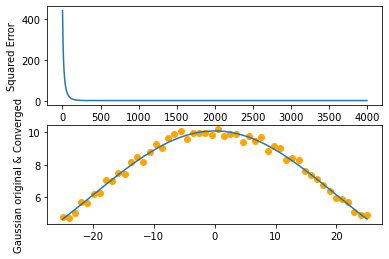

Gradient Descent - Noise factor = 0.1 
Error =  0.47345464126402437


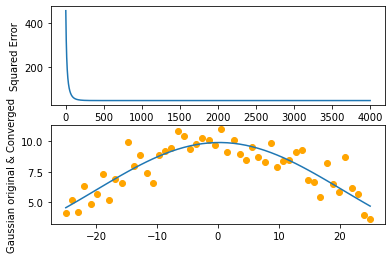

Gauss Newton - Noise factor = 0.01
Error =  0.009218176599704857


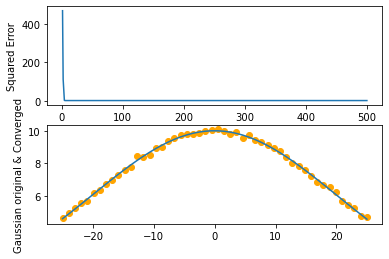

Gauss Newton - Noise factor = 0.01
Error =  1.8423807856124328


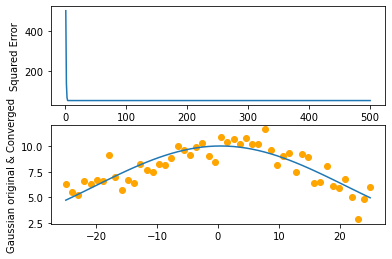

Levenberg Marquardt - Noise Factor = 0.01 - Lenda = 0.01
Error =  0.02386330339282382


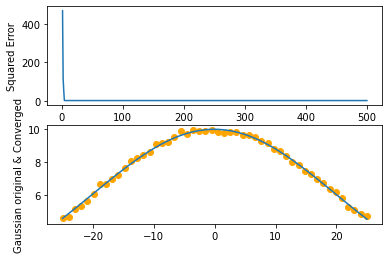

Levenberg Marquardt - Noise Factor = 0.01 - Lenda = 0.01
Error =  0.01811984774273596


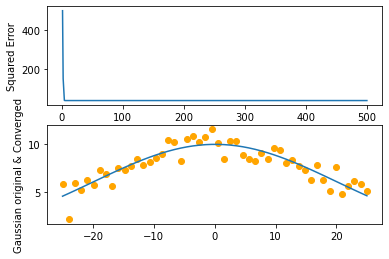

In [6]:
#Plotting and Comparing Different Iterations/ Learning Rates for Different Methods

plt.figure()
print("Gradient Descent - 200 iterations")
k_grad, rsq_grad = gradient_des(x_obs,y_obs,k,200, 0.01)
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs,label="True Gaussian")
plt.plot(x_obs,y_calc(x_obs,k_grad),label = "Grad Descent")
plt.show()

plt.figure()
print("Gradient Descent - 500 iterations")
k_grad, rsq_grad = gradient_des(x_obs,y_obs,k,500, 0.01)
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

plt.figure()
print("Gradient Descent - 4000 iterations")
k_grad, rsq_grad = gradient_des(x_obs,y_obs,k,4000, 0.01)
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

plt.figure()
print("Gradient Descent - Learning rate = 0.1 - 4000 iterations")
k_grad, rsq_grad = gradient_des(x_obs,y_obs,k,4000, 0.1)
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

plt.figure()
print("Gauss Newton")
k_gn, rsq_gn = gauss_newton(x_obs,y_obs,k,500)
niter_gn = np.linspace(1,len(rsq_gn),len(rsq_gn))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_gn, rsq_gn)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_gn))
plt.show()

plt.figure()
print("Levenberg Marquardt - Lenda = 0.01")
lenda = 0.01
k_lm, rsq_lm = lm(x_obs,y_obs,k,500,lenda)
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()

plt.figure()
print("Levenberg Marquardt - Lenda = 0.02")
lenda = 0.02
k_lm, rsq_lm = lm(x_obs,y_obs,k,500,lenda)
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()

plt.figure()
print("Levenberg Marquardt - Lenda = 0.1")
lenda = 0.1
k_lm, rsq_lm = lm(x_obs,y_obs,k,500,lenda)
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()

plt.figure()
print("Levenberg Marquardt - Lenda = 0.01 - Large Initialization")
lenda = 0.01
k_lm, rsq_lm = lm(x_obs,y_obs,np.array([100,50,100]),500,lenda)
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.plot(x_obs,y_obs)
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()


print("Adding Noise\n")

nf = 0.01
plt.figure()
print("Gradient Descent - Noise factor = 0.01 ")

y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
k_grad, rsq_grad = gradient_des(x_obs,y_noise,k,4000, 0.01)
print("Error = ", r_square_calc(k_grad,x_obs,y_obs))
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise,color = "orange")
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

nf = 0.02
plt.figure()
print("Gradient Descent - Noise factor = 0.02")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
k_grad, rsq_grad = gradient_des(x_obs,y_noise,k,4000, 0.01)
print("Error = ", r_square_calc(k_grad,x_obs,y_obs))
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise,color = "orange")
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

nf = 0.1
plt.figure()
print("Gradient Descent - Noise factor = 0.1 ")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
k_grad, rsq_grad = gradient_des(x_obs,y_noise,k,4000, 0.01)
print("Error = ", r_square_calc(k_grad,x_obs,y_obs))
niter_grad = np.linspace(1,len(rsq_grad),len(rsq_grad))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_grad, rsq_grad)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise,color = "orange")
plt.plot(x_obs,y_calc(x_obs,k_grad))
plt.show()

nf = 0.01
plt.figure()
print("Gauss Newton - Noise factor = 0.01")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
k_gn, rsq_gn = gauss_newton(x_obs,y_noise,k,500)
print("Error = ", r_square_calc(k_gn,x_obs,y_obs))
niter_gn = np.linspace(1,len(rsq_gn),len(rsq_gn))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_gn, rsq_gn)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise,color = "Orange")
plt.plot(x_obs,y_calc(x_obs,k_gn))
plt.show()

nf = 0.1
plt.figure()
print("Gauss Newton - Noise factor = 0.01")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
k_gn, rsq_gn = gauss_newton(x_obs,y_noise,k,500)
print("Error = ", r_square_calc(k_gn,x_obs,y_obs))
niter_gn = np.linspace(1,len(rsq_gn),len(rsq_gn))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_gn, rsq_gn)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise,color = "Orange")
plt.plot(x_obs,y_calc(x_obs,k_gn))
plt.show()



nf = 0.01
plt.figure()
print("Levenberg Marquardt - Noise Factor = 0.01 - Lenda = 0.01")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
lenda = 0.01
k_lm, rsq_lm = lm(x_obs,y_noise,k,500,lenda)
print("Error = ", r_square_calc(k_lm,x_obs,y_obs))
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise, color = 'orange')
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()

nf = 0.1
plt.figure()
print("Levenberg Marquardt - Noise Factor = 0.01 - Lenda = 0.01")
y_noise = y_obs + +np.random.normal(0,a_gt*nf,50)
lenda = 0.01
k_lm, rsq_lm = lm(x_obs,y_noise,k,500,lenda)
print("Error = ", r_square_calc(k_lm,x_obs,y_obs))
niter_lm = np.linspace(1,len(rsq_lm),len(rsq_lm))
plt.subplot(2,1,1)
plt.ylabel("Squared Error")
plt.plot(niter_lm, rsq_lm)
plt.subplot(2,1,2)
plt.ylabel("Gaussian original & Converged")
plt.scatter(x_obs,y_noise, color = 'orange')
plt.plot(x_obs,y_calc(x_obs,k_lm))
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

|Algorithm | Learning rate          | Initialization         | No. of observations | Noise Factor    |Iterations to converge   |
| ------------- |:------------- |:-------------:| -------:| -------:|-------:|
| Gradient Descent| 0.01      | 10, 13, 19.12    | 50 |0| 1202  |
| Gradient Descent| 0.01      | 100, 50, 100    | 50 | 0| Does not converge |
| Gradient Descent| 0.02      | 10, 13, 19.12    | 50 | 0| 943 |
| Gradient Descent| 0.03      | 10, 13, 19.12    | 50 | 0|821  |
| Gradient Descent| 0.1      | 10, 13, 19.12    | 50 | 0|Does not converge  |
| Gradient Descent| 0.01      | 10, 13, 19.12    | 100 | 0| 845 |
| Gradient Descent| 0.01      | 10, 13, 19.12    | 25 | 0| > 4000  |
| Gradient Descent| 0.01      | 10, 13, 19.12    | 50 | 0.01| Error = 0.024   |
| Gradient Descent| 0.01      | 10, 13, 19.12    | 50 | 0.02|  Error = 0.009 |
| Gradient Descent| 0.01      | 10, 13, 19.12    | 50 | 0.1|  Error = 0.577  |

If we increase Learning rate by little : Performance Improves

If learning rate is increased too much : Fails to converge as when lr = 0.1

Explain your experimentations with justification here

|Algorithm | Initial Estimate      | No. of obseravtions    | Noise Factor  | No. of iterations to converge  |
| ------------- |:-------------:| -------:|-------:|-------:|
| Gauss Newton     | 10, 13, 19.12    | 50 | 0 |7|
| Gauss Newton      | 100, 50, 100     | 50 | 0 |Does not converge|
| Gauss Newton      | 10, 13, 19.12     | 100 | 0 |6|
| Gauss Newton      | 10, 13, 19.12      | 25 | 0 |6|
| Gauss Newton     | 10, 13, 19.12    | 50 | 0.01 |Error = 0.084|
| Gauss Newton     | 10, 13, 19.12    | 50 | 0.1 |Error = 3.923|

|Algorithm | Initial Estimate      | No. of obseravtions    | Lenda  | Noise Factor | No. of iterations to converge  |
| ------------- |:-------------:| -------:|-------:|-------:|-------:|
| Levenberg Marquardt      | 10, 13, 19.12      | 50 | 0.01 |0|7|
| Levenberg Marquardt      | 10, 13, 19.12      | 50 | 0.02 |0|7|
| Levenberg Marquardt      | 10, 13, 19.12      | 50 | 0.1 |0|8|
| Levenberg Marquardt      | 100, 50, 100       | 50 | 0.01 |0| 60 |
| Levenberg Marquardt      | 10, 13, 19.12      | 100 | 0.01 |0|6|
| Levenberg Marquardt      | 10, 13, 19.12      | 25 | 0.01 |0|7|
| Levenberg Marquardt      | 10, 13, 19.12      | 50 | 0.01 |0.01|Error = 0.045|
| Levenberg Marquardt      | 10, 13, 19.12      | 50 | 0.01 |0.1|Error = 2.414|


When the initialization is very far from original:

- Gradient Descend : Does not converge
- Gauss Newton : Performs worst, Does not converge
- Levenberg Marquardt : Converging slows down put still performs nicely

When the number of observations are increases: All three converge faster

When the number of observations are deacreased: 
- Gradient Descend Converges slower
- No observable effect on GN and LM

For Added Noise:
- Gradient descent : Converged better to real curve for high noise factor
- Gauss Newton : Not much effected my noise, converges efficiently
- Levemberg Marquardt : Least Effected by noise, converges to original curve best

Reason : As we add Regularisation term (lenda), LM prevents overfitting to the noise and converges to required curve.

# ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [5]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
  plt.cla()
  plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
  plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
  plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
  plt.legend(('X', 'P', 'P0'), loc='lower left')
  plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
  plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
  plt.axis([-10, 15, -10, 15])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.draw()
  plt.pause(2)
  return

# Generating data for our simple ICP
def generate_data():
  
  # create reference data  
  X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
  # add noise
  P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
  # translate
  P[0,:] = P[0,:] + 1
  P[1,:] = P[1,:] + 1
  
  # rotate
  theta1 = ( 10.0 / 360) * 2 * np.pi
  theta2 = (110.0 / 360) * 2 * np.pi
  rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
  rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
  # sets with known correspondences
  P1 = np.dot(rot1, P)
  P2 = np.dot(rot2, P)
  
  return X, P1, P2


In [6]:
# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X,P1,P2 = generate_data()

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0 = P #Initialization
    for i in range(num_iter):
        # implementing ICP:
        #centre of mass
        P_mu = np.array([[sum(P[0,:])/len(P[0,:])], [sum(P[1,:])/len(P[1,:])]])
        X_mu = np.array([[sum(X[0,:])/len(X[0,:])], [sum(X[1,:])/len(X[1,:])]])
        
        #normalized
        X_norm = np.zeros(X.shape)
        P_norm = np.zeros(P.shape)
        X_norm[0,:] = X[0,:]-X_mu[0,0]
        X_norm[1,:] = X[1,:]-X_mu[1,0]
        P_norm[0,:] = P[0,:]-P_mu[0,0]
        P_norm[1,:] = P[1,:]-P_mu[1,0]
        
        
        W = np.dot(X_norm,P_norm.T)
        
        U, S, V = np.linalg.svd(W, full_matrices=True, compute_uv=True, hermitian=False) #svd decomposition   

        
        # TODO2.1: what's current error?
        rmse = np.sqrt(np.sum(np.square(P - X))/(2*len(P[1,:])))
        
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        
        # TODO2.3: Implement ICP to get R, t
        R = np.dot(U,V.T)
        t = X_mu - np.dot(R,P_mu)
        
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
        
    #plot_icp(X, P, P0, i, rmse)

    return


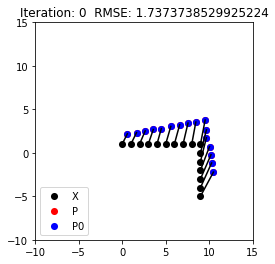

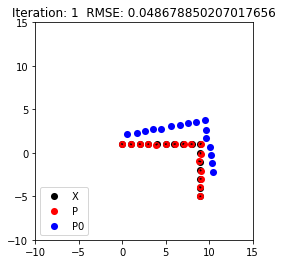

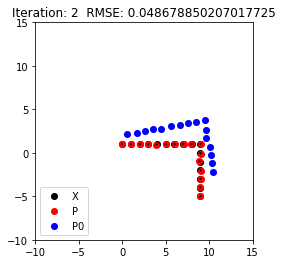

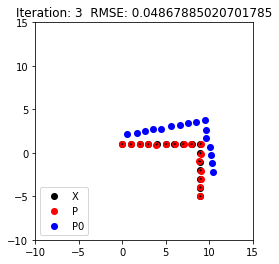

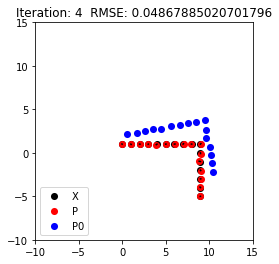

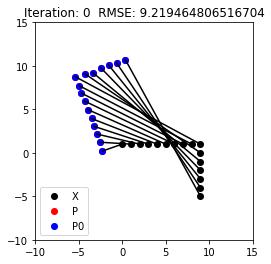

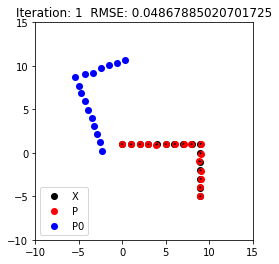

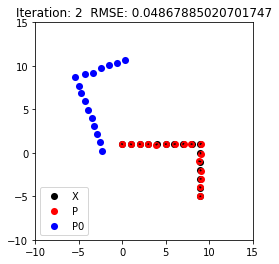

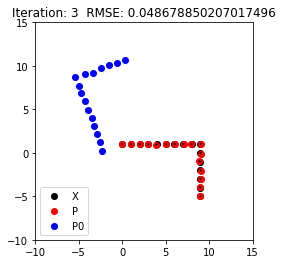

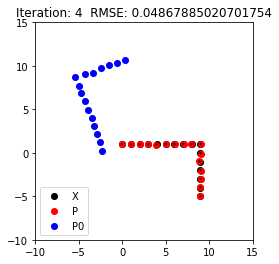

In [7]:
# Call ICP on P1 & P2

ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this